# Visualisation

We are going to learn the single method `plot`.  Sounds like an easy worksheet, but this one method can do lots of things.  As you see all the options, think of the base concepts at play.  What is a method call, what is a parameter, what values are series and which are data frames?

[The pandas documentation for visualisation](https://pandas.pydata.org/docs/user_guide/visualization.html) is quite good.  You might consider consulting it as you go through this worksheet.

## Choosing the right viz

Key to effective use of visualisation is choosing the right visualisation for the data you have.  The following table is a rough guide

| plot | use |
|------|-----|
| line | time series data |
| bar  | comparison of quantities |
| box  | comparison of a spread of values | 
| scatter | looking for correlations |
| pie | data adds up to a whole |
| hexbin | looking for correlations in high-denisty data |
| grouped scatter | looking for characteristic differences in populations |

# `plot`

Everything comes down to this one method.  As a base it:
  * works on a series
  * creates a line plot

In this example, I plot the cummulative rainfall for hornsby in 2022.  Note, I use the [`cumsum` method](https://pandas.pydata.org/docs/reference/api/pandas.Series.cumsum.html) that makes a new series from an existing series and plot that instead of plotting data from the original frame

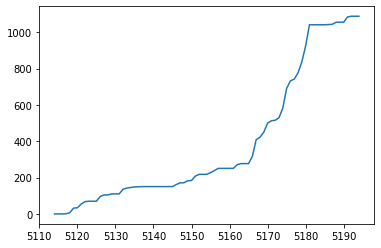

In [39]:
import pandas as pd

rainfall = pd.read_csv("data/rainfall/hornsby_pool.csv")
choose_2022 = rainfall["Year"] == 2022
amount_2022 = rainfall[choose_2022]["Rainfall amount (millimetres)"]
cummulative_2022 = amount_2022.cumsum()
ax=cummulative_2022.plot()

# Exercise

Use a line plot to plot the "Rainfall amount (millimetres)" series from lithgow.  This plot is much harder to interpret - why is this?  Can you see why we plotted cummulative rainfall instead?

In [40]:
# put solution here

The basic operation of `plot` is extended with the `kind` parameter.  For example, here is a an example of a histogram.  Note that histogram will autmatically bucket the data for you!  Thus we automatically get a plot of the number of days with each level of rainfall.  So helpful.

By the way, if you are interested in when to use a histogram vs when to use a bar graph - [this page has quite a nice explanation](https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts)

<AxesSubplot:ylabel='Frequency'>

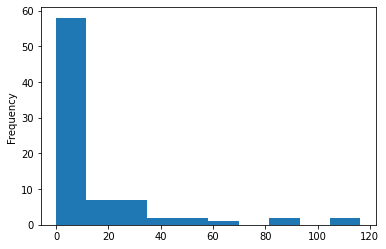

In [41]:
amount_2022.plot(kind="hist")

We should now be on-guard since a single extra parameter has done a power of work for us!  This is OK, but we must know that the `kind` parameter _can do data summarisation for us_.

# Exercise

Whether or not it is a good visualistaion, can you work out how to get a bar for each day that shows the rainfall on that day?  `amount_2022` is the Series you want, but what kind of plot will do that?


In [42]:
# put solution here


The next question we will try to visualise is "what are the average rainfalls in of high rainfall days in lithgow in March".  The right tool for this job is the "box plot" (we've set 20mm as a high rainfall amount). 

<AxesSubplot:>

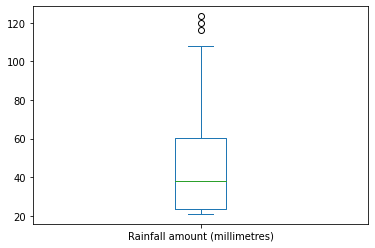

In [43]:
march = rainfall["Month"] == 3
high_rainfall_day = rainfall["Rainfall amount (millimetres)"] > 20
rainfall[ march & high_rainfall_day]["Rainfall amount (millimetres)"].plot(kind="box")


# Scatter plots can't work on Series

Because they compare one column to another.  Thus this is our first look at plotting directly on the dataframe.

<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>

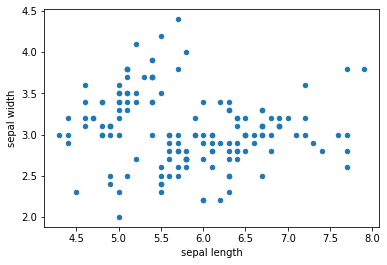

In [44]:
iris = pd.read_csv("data/iris.csv")

iris.plot(kind="scatter", x="sepal length", y="sepal width")

To be honest, I am a little disapointed.  I was expecting a correlation.  Perhaps I should to it per-species?

<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>

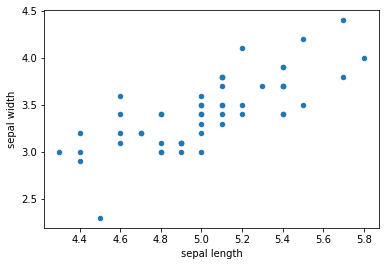

In [45]:
just_setosa = iris["class"] == "Iris-setosa"

iris[just_setosa].plot(kind="scatter", x="sepal length", y="sepal width")

much better!

# Exercise

Plot "Handballs" vs "Disposals" from the `data/afl/stats.csv` file as a scatter plot.  Your plot will show you that I chose a bad correlation to look for.  If you follow AFL you will know why :)

In [46]:
# put solution here

Sometimes a scatter plot gets crowded.  A "hexbin" will combine close dots and make a colour to indicate how represented each "bin" is

<AxesSubplot:xlabel='Contested Possessions', ylabel='Uncontested Possessions'>

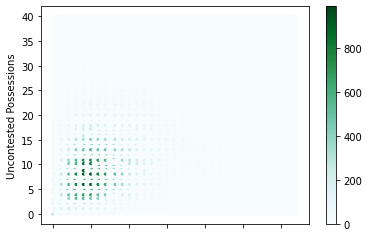

In [47]:
afl = pd.read_csv("data/afl/stats.csv")

afl.plot(kind="hexbin", x="Contested Possessions", y="Uncontested Possessions")

# Exercise

Redo the last scatter plot (disposals vs handballs) as a hexbin.  The fact that it is an invalid correlation is no longer visible in the plot!  Take this as a lesson on the importance of plot-type.

In [48]:
# put solution here

# You only showed me two plots on data frames!

Most of the plots we learned for Series do sensible things for DataFrames.  I encourage you to guess what they do before experimenting yourself to find out.

# Exercise

Use a box plot directoy on the data frame your get from loading the `iris` data set.  Before you do it, make a guess about what it will do.  Did the plot match your expectations?  Based on what you see, without looking up the documentation, can you describe what `plot(kind="box")` does when used on data frame instead of a series?  After you do it once, go back and remove that outlier we found in the last class and plot it again.  The outlier that was hard to find in the table is very obvious in the box plot.

In [49]:
# box plot the whole frame

# Plotting more than one thing

You can "capture" a reference to a plot and then add new plots to it.  The length of the axis will automatically grow to accomodate the new data.  To add a new plot to an existing plot, you pass the reference in as an `ax` parameter.  Here are two examples:
  * All three species of iris included in the one scatter plot.  We see that "setosa" is distinctly different but that all three have a correlation of some sort between width and length
  * The cummulative and daily rainfall on one graph. As we expect, the cummulative rises quickly where the daily is high.

`ax` is for "axis" on which to do this plot.

<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>

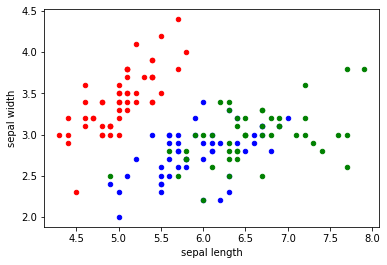

In [50]:
just_setosa = iris["class"] == "Iris-setosa"
just_versicolor = iris["class"] == "Iris-versicolor"
just_virginica = iris["class"] == "Iris-virginica"

existing_plot = iris[just_setosa].plot(kind="scatter", color="Red", x="sepal length", y="sepal width")
iris[just_versicolor].plot(kind="scatter", color="Blue", x="sepal length", y="sepal width", ax=existing_plot)
iris[just_virginica].plot(kind="scatter", color="Green", x="sepal length", y="sepal width", ax=existing_plot)

<AxesSubplot:>

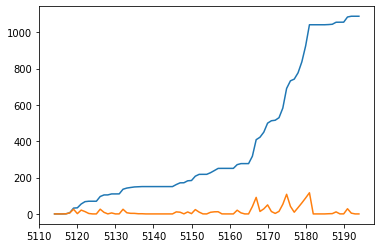

In [51]:
rainfall_plot = cummulative_2022.plot()
amount_2022.plot(ax=rainfall_plot)

# Concept Summary
  * plotting is done by the `plot` method of Series
  * there is similar `plot` method on DataFrames that is generally smart enough to do what we want.
  * the `kind` parameter determines what kind of plot you get
  * you can capture a plot axis and draw on it more than once
  * `scatter` and `hexbin` only make sence on DataFrames and _need_ to know which two columns you are comparing.

# Python Concepts
  * the `plot` method is so flexible that the documentation is hard to read
  * you might notice I was naming my "masks" and putting them in variables, I find that really helps readability
  * all the flexibility and all the power is bundled up in the paramters of `plot`.

# Exercise (advanced)

Matt's been racing again!  All the data is in the file `data/hmtba/2022-XC-Round-3-all.csv`.

Note:  It is part of the design of this task that the data is not very meaningful to you. I.e. you should not be able to easily interpret it.  This is to encourage you to focus your mind on the mechanics of plotting in pandas rather than to try and solve any problems by interpreting the chart you see.  Load up the data, check the info and have a go at these two tasks.

## Task 1

I want to see how well people's last laps (column "lastlap") correlate to their fastest laps (column "minlap").  Create a plot to show me this (choose the right kind of plot).  Note that column "ll" is a copy of "lastlap" but converted to a timedelta and "ml" is a copy of "minlap" converted to a timedelta.  Do you get different results using the originals vs the timedelta versions?  Can you explain why you are seeing what you see?

## Task 2

I would like a line plot showing me the gaps between riders.  These are stored in "gap0", "gap1", etc.  I am looking for a plot like [this](6-data_visualisation.png) where each row represents one rider (one row of the table). What do you get from a line plot of these columns.  Can you explain what you are seeing.  What would you need to get the plot I am asking for?  I've provided a file with some of the data in a different format that might help (`data/hmtba/2022-XC-Round-3-gaps-transposed`).  Can you make the plot match my example _exactly_.  To do so, you will need to use some of the optional parameters from `plot`, [read the documentation and experiment](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).